In [1]:
import torch
from op_const_lap import *
import matplotlib.pyplot as plt
from torch_geometric.datasets.sbm_dataset import StochasticBlockModelDataset
from torch_geometric.utils import get_laplacian, to_dense_adj

In [2]:
block_sizes = torch.tensor([20,20,20])
edge_probs = torch.tensor([[0.8,0.3,0.3], [0.3,0.8,0.3], [0.3,0.3,0.8]])
data = StochasticBlockModelDataset(root='data/', block_sizes=block_sizes, num_channels=5, edge_probs=edge_probs)[0]

In [3]:
L = to_dense_adj(get_laplacian(data.edge_index)[0], edge_attr=get_laplacian(data.edge_index)[1])[0]
X = torch.cat([torch.normal(mean=torch.tensor(data.y, dtype=torch.float32)).unsqueeze(0),torch.normal(mean=torch.tensor(data.y, dtype=torch.float32)).unsqueeze(0)], dim=0).t()

/var/folders/v7/6y4d148j17v1f9cfgqn0t_ym0000gn/T/ipykernel_67547/369771549.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.cat([torch.normal(mean=torch.tensor(data.y, dtype=torch.float32)).unsqueeze(0),torch.normal(mean=torch.tensor(data.y, dtype=torch.float32)).unsqueeze(0)], dim=0).t()


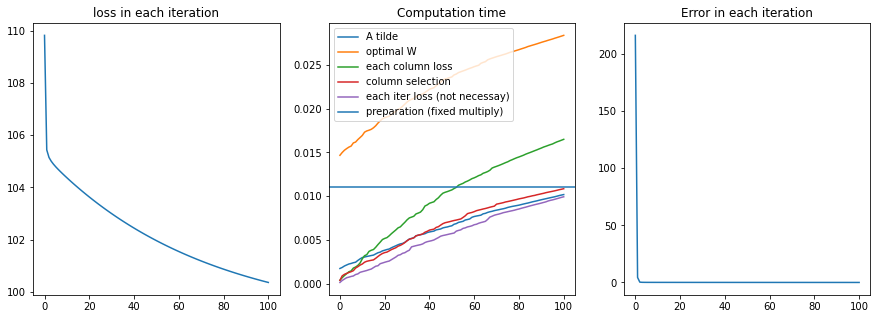

In [4]:
W, _, _, _, _, _ = op_const_lap(X, L, r=3, lambda1=1, epsilon=1e-3, ratio=0.5, max_iter=100, plot=True, training_mask=None)